In [13]:
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
from imageio import imread
from keras.applications.mobilenet_v2 import preprocess_input
from skimage.transform import resize
from keras.layers import Dense 
from keras import Model
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions

import matplotlib.pyplot as plt

In [15]:

image_size = (224, 224)
batch_size = 32

train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages//train",
    validation_split=0.3,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages//test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20567 files belonging to 2 classes.
Using 14397 files for training.
Using 6170 files for validation.
Found 2855 files belonging to 2 classes.


In [16]:
image_size = (224, 224)
batch_size = 32
normalized_train_ds = train_ds.map(lambda x, y: (tf.keras.applications.mobilenet.preprocess_input(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.keras.applications.mobilenet.preprocess_input(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (tf.keras.applications.mobilenet.preprocess_input(x), y))

In [17]:
base_model = keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
new_model = keras.Model(inputs, outputs)

new_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

history = new_model.fit(normalized_train_ds, epochs=10, validation_data=normalized_val_ds)



Epoch 1/10
450/450 [==============================] - 582s 1s/step - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.0394 - val_accuracy: 0.9854
Epoch 2/10
450/450 [==============================] - 560s 1s/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 0.0342 - val_accuracy: 0.9867
Epoch 3/10
450/450 [==============================] - 556s 1s/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0323 - val_accuracy: 0.9877
Epoch 4/10
450/450 [==============================] - 567s 1s/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 5/10
450/450 [==============================] - 564s 1s/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 6/10
450/450 [==============================] - 564s 1s/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 7/10
450/450 [==============================] - 577s 1s/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0340 - val_accuracy: 0.9883

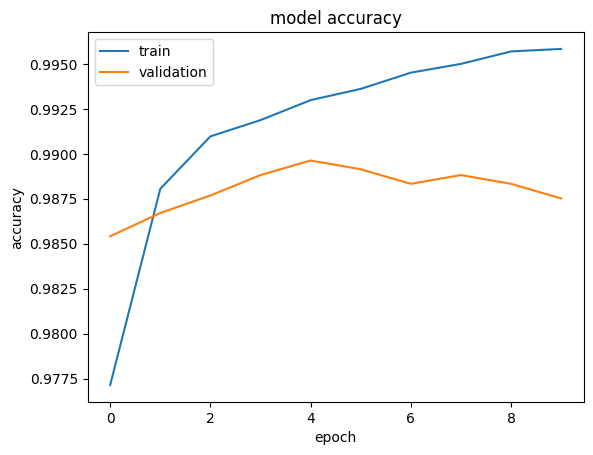

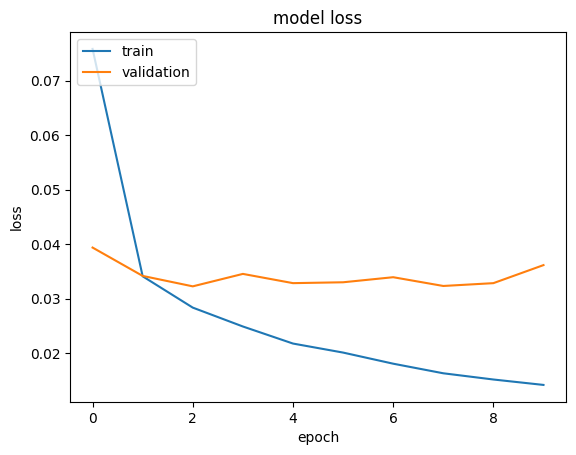

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
from imageio import imread
from keras.applications.mobilenet_v2 import preprocess_input
from skimage.transform import resize
from keras.layers import Dense 
from keras import Model
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions

import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(train_2), axis=1)
y_true = model.predicted(val_ds)

confusion_matrix = metrics.confusion_matrix(y_pred, y_true)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()  

NameError: name 'model' is not defined